# Exploration plots

``plscan`` contains several attributes for exploring and plotting its the cluster
hierarchy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (2.75, 0.618 * 2.75)

data = np.load("data/clusterable/sources/clusterable_data.npy")

### Condensed tree

Like ``hdbscan``, ``plscan`` has a condensed tree showing the cluster hierarchy
along data point distances. Unlike ``hdbscan``, ``plscan`` uses distances rather
than density estimates to plot the tree.

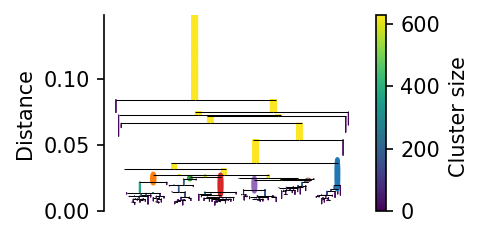

In [2]:
c = PLSCAN().fit(data)

c.condensed_tree_.plot(select_clusters=True)
plt.show()

The `distance_cut()` method can be used to extract clusters at a given distance:

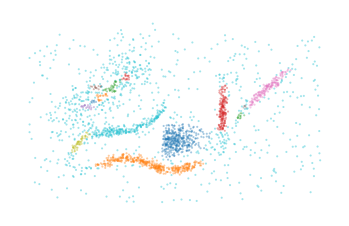

In [3]:
labels, probs = c.distance_cut(0.015)
plt.scatter(*data.T, c=labels % 10, s=1, alpha=0.4, linewidth=0, cmap="tab10")
plt.axis("off")
plt.show()

### Leaf tree

``plscan`` does not extract clusters from the condensed tree directly. Instead, it
first creates a cluster hierarchy describing which clusters exist at each minimum cluster size value. The `leaf_tree_` attribute contains this hierarchy:

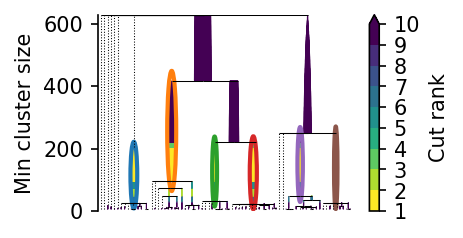

In [4]:
c = PLSCAN().fit(data)

c.leaf_tree_.plot(select_clusters=True, leaf_separation=0.1)
plt.show()

The `min_cluster_size_cut()` method can be used to extract clusters at a given minimum cluster size:

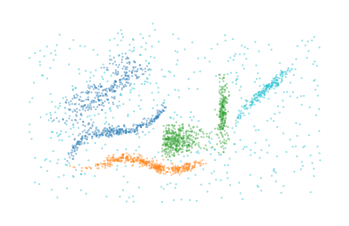

In [5]:
labels, probs = c.min_cluster_size_cut(300)
plt.scatter(*data.T, c=labels % 10, s=1, alpha=0.4, linewidth=0, cmap="tab10")
plt.axis("off")
plt.show()

### Persistence trace

``plscan`` extracts clusters from the leaf tree by computing each leaf cluster's
persistence and finding the minimum cluster size with the highest leaf-cluster
persistence sum. The `persistence_trace_` attribute can plot this minimum
cluster size -- persistence trace.

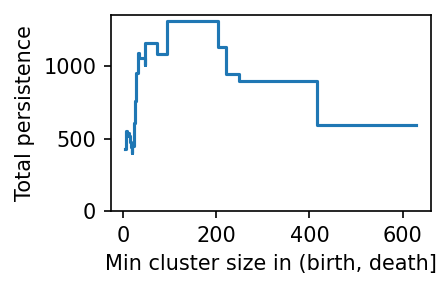

In [6]:
c.persistence_trace_.plot()
plt.show()

By default, the minimum cluster size with the highest persistence value is
selected. Other interesting clusterings can be explored using the
`cluster_layers` method:

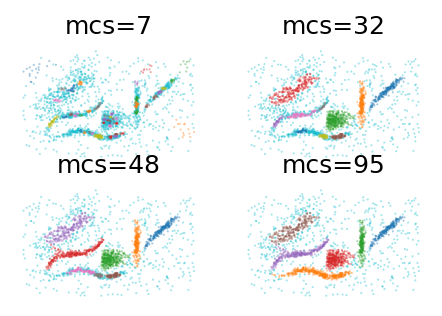

In [7]:
layers = c.cluster_layers(max_peaks=4)

for i, (size, labels, probs) in enumerate(layers):
    plt.subplot(2, 2, i + 1)
    plt.scatter(*data.T, c=labels % 10, s=1, alpha=0.4, linewidth=0, cmap="tab10")
    plt.title(f"mcs={int(size)}")  # mcs = min cluster size
    plt.axis("off")
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

These interesting clusterings relate to peaks in the
minimum_cluster_size--persistence curve:

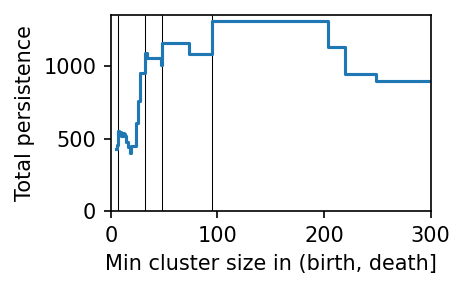

In [8]:
c.persistence_trace_.plot()
plt.vlines(list(zip(*layers))[0], *plt.ylim(), color="k", linewidth=0.5, zorder=1)
plt.xlim([0, 300])
plt.show()